In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

#python environment check 3.10.3

In [2]:
feature_vectors = np.loadtxt(r'E:\Drive D\MA-ICT Convergence\Thesis\Human-Human-Interaction\src\feature_vector\ch4_feature_vectors.csv', delimiter=',')

In [3]:
labels_df = pd.read_csv(r'E:\Drive D\MA-ICT Convergence\Thesis\Human-Human-Interaction\src\feature_vector\ch4_labels.csv')
labels = labels_df['Label'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.2, random_state=42)

In [5]:
svm_classifier = SVC(kernel='linear')

In [6]:
svm_classifier.fit(X_train, y_train)

In [7]:
y_pred = svm_classifier.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [11]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.9775
Classification Report:
               precision    recall  f1-score   support

     hugging       0.96      0.99      0.97       215
     kicking       0.97      0.97      0.97       222
        none       0.98      0.96      0.97       194
    pointing       1.00      0.99      0.99       189
    punching       0.98      0.99      0.98       204
     pushing       0.98      0.96      0.97       176

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

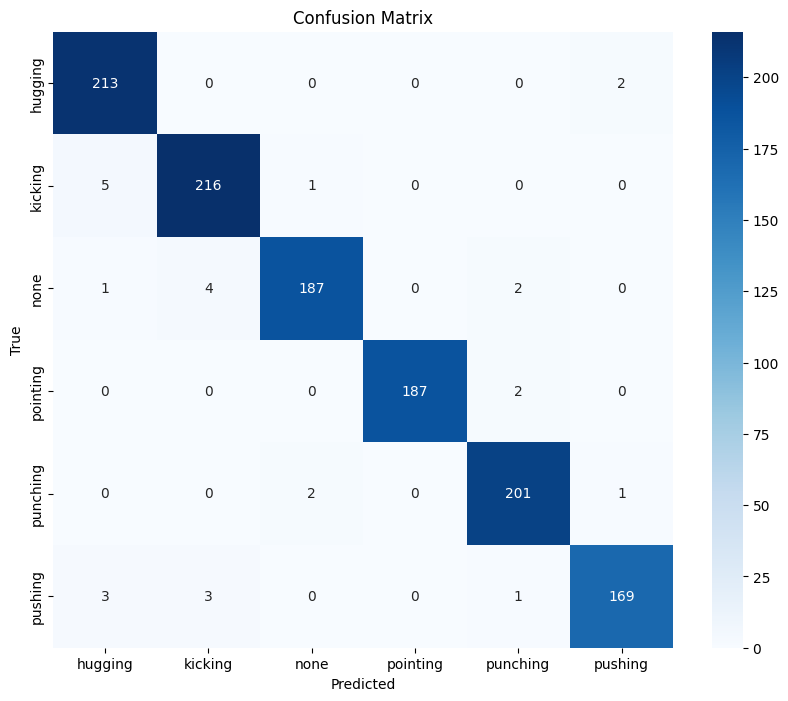

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
joblib.dump(svm_classifier, r'E:\Drive D\MA-ICT Convergence\Thesis\Human-Human-Interaction\src\model\add_one_class_svm_model.pkl')
print("SVM model saved successfully.")

SVM model saved successfully.
